# About the dataset
You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

The problem solved is:
- Regression: What features best predict one's income?

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data

In [2]:
df = pd.read_csv('./401ksubs.csv')
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [3]:
df.shape

(9275, 11)

<AxesSubplot:xlabel='age', ylabel='inc'>

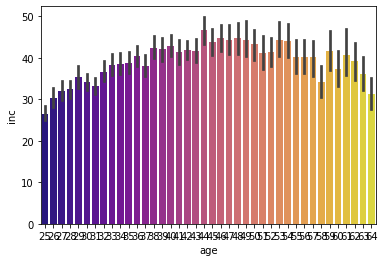

In [4]:
import seaborn as sns
sns.barplot(x ='age', y ='inc', data = df, palette ='plasma')

<AxesSubplot:xlabel='male', ylabel='inc'>

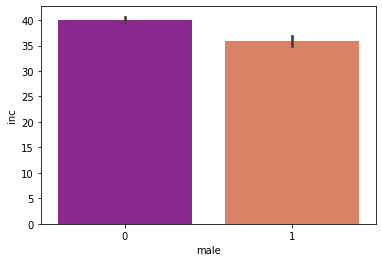

In [6]:
sns.barplot(x ='male', y ='inc', data = df, palette ='plasma')

# Scale the data

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df),columns = df.columns)
scaled_df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,-0.803173,-1.082858,-1.300887,-0.506898,-0.104886,-1.235500,-0.226651,-0.617776,1.712236,-0.648965,-0.216227
1,1.245062,0.912268,-1.300887,1.972784,-0.590372,-1.235500,2.109561,1.618709,-0.584032,0.542404,-0.634940
2,-0.803173,-1.095810,0.768706,-0.506898,0.283503,-0.580086,-0.298179,-0.617776,-0.584032,-0.651671,0.158941
3,-0.803173,2.475242,0.768706,1.972784,0.283503,-0.580086,0.042656,-0.617776,-0.584032,2.550909,0.158941
4,-0.803173,-0.690807,-1.300887,-0.506898,1.157377,-1.235500,-0.009720,-0.617776,-0.584032,-0.536366,1.133706


In [8]:
X

,marr,male,agesq,fsize,nettfa
0,0,0,1600,1,4.575
1,0,1,1225,1,154.000
2,1,0,1936,2,0.000
3,1,1,1936,2,21.800
4,0,0,2809,1,18.450
...,...,...,...,...,...
9270,1,0,1089,4,-1.200
9271,0,1,1369,3,2.000
9272,1,0,1089,3,-13.600
9273,1,0,3249,3,3.550


In [10]:
X = scaled_df.drop(columns = ['e401k', 'p401k', 'pira', 'inc', 'incsq'])

y = scaled_df['inc'] # as while predicting the income there is no need for income and income square

In [11]:
X[0:5]

,marr,male,age,fsize,nettfa,agesq
0,-1.300887,-0.506898,-0.104886,-1.235500,-0.226651,-0.216227
1,-1.300887,1.972784,-0.590372,-1.235500,2.109561,-0.634940
2,0.768706,-0.506898,0.283503,-0.580086,-0.298179,0.158941
3,0.768706,1.972784,0.283503,-0.580086,0.042656,0.158941
4,-1.300887,-0.506898,1.157377,-1.235500,-0.009720,1.133706


In [12]:
y[0:5]

0   -1.082858
1    0.912268
2   -1.095810
3    2.475242
4   -0.690807
Name: inc, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop(columns = ['e401k', 'p401k', 'pira', 'inc', 'incsq']),scaled_df['inc'],test_size = 0.25,random_state = 42)

In [14]:
X_train

,marr,male,age,fsize,nettfa,agesq
5544,-1.300887,1.972784,-1.367149,-1.235500,-0.375962,-1.188758
4471,0.768706,-0.506898,-1.172955,0.730742,-0.115973,-1.063703
4057,-1.300887,-0.506898,0.186406,-1.235500,-0.352901,0.061799
8879,-1.300887,1.972784,1.060280,-0.580086,0.734475,1.016466
8927,-1.300887,-0.506898,-0.978760,-1.235500,-0.226260,-0.929714
...,...,...,...,...,...,...
5734,0.768706,-0.506898,2.225446,-0.580086,-0.117833,2.570730
5191,-1.300887,-0.506898,0.477697,0.075328,-0.307576,0.359923
5390,-1.300887,-0.506898,-1.561343,0.075328,-0.298179,-1.304882
860,-1.300887,1.972784,-1.367149,0.730742,-0.346553,-1.188758


In [15]:
X_test

,marr,male,age,fsize,nettfa,agesq
1313,0.768706,-0.506898,0.186406,0.730742,-0.210891,0.061799
4631,0.768706,-0.506898,-0.881663,0.075328,-0.298179,-0.859371
5162,-1.300887,1.972784,-0.590372,-1.235500,-0.073040,-0.634940
6365,-1.300887,-0.506898,1.254474,0.730742,-0.180935,1.253178
1018,0.768706,-0.506898,-0.881663,0.075328,-0.307294,-0.859371
...,...,...,...,...,...,...
1952,-1.300887,-0.506898,-1.172955,-1.235500,0.345969,-1.063703
5746,0.768706,-0.506898,-1.367149,0.075328,-0.835731,-1.188758
3202,-1.300887,-0.506898,2.128349,-0.580086,-0.286453,2.428926
1163,-1.300887,1.972784,-0.104886,-1.235500,-0.298179,-0.216227


In [16]:
y_test

1313   -0.414080
4631   -1.091576
5162    0.472145
6365   -0.833778
1018   -0.952091
          ...   
1952   -0.127140
5746   -1.171904
3202   -0.526165
1163   -0.604750
7073    0.565425
Name: inc, Length: 2319, dtype: float64

# Regression model 

1. Linear Regression
2. KNN
3. Decision Tree
4. Random Forerst 
5. SVM

In [27]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)


from sklearn.tree import DecisionTreeRegressor 
dec_tree_reg=DecisionTreeRegressor(random_state = 0) 
dec_tree_reg.fit(X_train,y_train)


from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)


from sklearn.svm import SVR
support_vector_reg = SVR()
support_vector_reg.fit(X_train, y_train)

SVR()

# Evaluate the model

In [28]:
from sklearn.metrics import mean_squared_error, f1_score
def rmse_score(model, X_train, X_test, y_train, y_test):
    mse_train = mean_squared_error(y_true = y_train,
                                  y_pred = model.predict(X_train))
    mse_test = mean_squared_error(y_true = y_test,
                                  y_pred = model.predict(X_test))
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5
    
    print("The training RMSE for " + str(model) + " is: " + str(rmse_train))
    print("The testing RMSE for " + str(model) + " is: " + str(rmse_test))
    return (rmse_train, rmse_test)

### Linear Regression

In [38]:
x1,y1 = rmse_score(linear_reg, X_train, X_test, y_train, y_test)

The training RMSE for LinearRegression() is: 0.8338528072454054
The testing RMSE for LinearRegression() is: 0.8709984295827725


### KNN Regression

In [39]:
x2,y2= rmse_score(knn_reg, X_train, X_test, y_train, y_test)

The training RMSE for KNeighborsRegressor() is: 0.6848906790335128
The testing RMSE for KNeighborsRegressor() is: 0.8412473805774943


### Decision Tree Regression

In [40]:
x3,y3= rmse_score(dec_tree_reg, X_train, X_test, y_train, y_test)

The training RMSE for DecisionTreeRegressor(random_state=0) is: 0.095403146666503
The testing RMSE for DecisionTreeRegressor(random_state=0) is: 1.137558634770343


### Random Forest Regression

In [41]:
x4, y4= rmse_score(random_forest_reg, X_train, X_test, y_train, y_test)

The training RMSE for RandomForestRegressor() is: 0.3224260574190457
The testing RMSE for RandomForestRegressor() is: 0.8489977285700421


### Support Vector Regression

In [42]:
x5, y5 = rmse_score(support_vector_reg, X_train, X_test, y_train, y_test)

The training RMSE for SVR() is: 0.7852663720624707
The testing RMSE for SVR() is: 0.8166511711807092


### Plotting the results

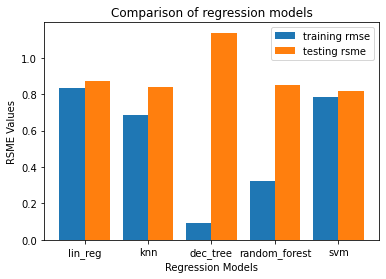

In [44]:
X = ['lin_reg','knn','dec_tree','random_forest' , 'svm']
train = [x1,x2,x3,x4,x5]
test = [y1,y2,y3,y4,y5]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, train, 0.4, label = 'training rmse')
plt.bar(X_axis + 0.2, test, 0.4, label = 'testing rsme')
  
plt.xticks(X_axis, X)
plt.xlabel("Regression Models")
plt.ylabel("RSME Values")
plt.title("Comparison of regression models")
plt.legend()
plt.show()